<a href="https://colab.research.google.com/github/poorya-abbasi/DL-HW02/blob/main/PooryaAbbasi_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 35.6MB/s]


In [3]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [21]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [22]:
print(df.shape)

(480, 17)


In [23]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)



In [24]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [25]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])


In [26]:
# Deviding Dataset to training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [27]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_test))

print('Shape of training set features ' ,np.shape(X_train))
print('Shape of training. set classes ' ,np.shape(y_train))
print('Shape of validation set features ' ,np.shape(X_test))
print('Shape of validation set classes ' ,np.shape(y_test))


Number of dataset:  480
Number of train set:  384
Number of validation set:  96
Shape of training set features  (384, 16)
Shape of training. set classes  (384,)
Shape of validation set features  (96, 16)
Shape of validation set classes  (96,)


In [28]:
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)


# ***Implementing Models***

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#Config
modelCount = 4
modelLabels = ['5 Layers, 16 Units, ReLu','6 Layers, 32 Units, ReLu','3 Layers, 20 Units, Relu','1 TanH Layer, 6 Layers, 32 Units, ReLu']
l_rate = 0.002
models = []


In [30]:
def addModel(unitSize,layerCount,function,addTanH = False,addReLu = False):
  model = Sequential()
  #Input Layer
  model.add(BatchNormalization(input_shape=(16,)))
  #Invoking TanH
  if addTanH:
    model.add(Dense(20,kernel_regularizer='l2',activation='tanh'))
  if addReLu:
    model.add(Dense(20,activation='relu'))
  #Adding Layers
  for i in range (0,layerCount):
    model.add(Dense(unitSize,kernel_regularizer='l2',activation=function))
  #Adding Output Layer
  model.add(Dense(3,activation='softmax'))
  # model.summary()
  opt = Adam(learning_rate=l_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  models.append(model)
  
addModel(16,5,'relu')
print(modelLabels[0],'ready')
addModel(32,6,'relu',addReLu=True)
print(modelLabels[1],'ready')
addModel(20,3,'relu')
print(modelLabels[2],'ready')
addModel(32,6,'relu',addTanH=True)
print(modelLabels[3],'ready')

5 Layers, 16 Units, ReLu ready
6 Layers, 32 Units, ReLu ready
3 Layers, 20 Units, Relu ready
1 TanH Layer, 6 Layers, 32 Units, ReLu ready


# ***Training the model***

In [31]:
histories = []
for i in range(0,modelCount):
  print("Training", modelLabels[i])
  histories.append(models[i].fit(X_train, y_train_cat, epochs=200, validation_split=0.2,verbose = 0).history)

Training 5 Layers, 16 Units, ReLu
Training 6 Layers, 32 Units, ReLu
Training 3 Layers, 20 Units, Relu
Training 1 TanH Layer, 6 Layers, 32 Units, ReLu


# ***Evaluating the models***

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Train Set**

Evaluating 5 Layers, 16 Units, ReLu 

12/12 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.9271
Accuracy of train set: 92.71


Train Predict Report===============

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       103
           1       0.98      0.97      0.98       106
           2       0.91      0.93      0.92       175

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384



Train Cunfusion Matrix===============

[[ 90   0  13]
 [  0 103   3]
 [ 10   2 163]]



Evaluating 6 Layers, 32 Units, ReLu 

12/12 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.9271
Accuracy of train set: 92.71


Train Predict Report===============

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       103
           1       0.97      0.94 

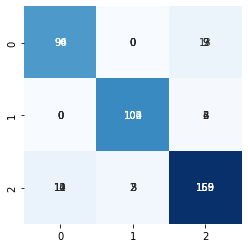

In [33]:
for i in range(0,modelCount):
  print("Evaluating",modelLabels[i],"\n")
  model = models[i]
  _, acc = model.evaluate(X_train,y_train_cat)
  print('Accuracy of train set: %.2f' % (acc*100))
  y_predict = model.predict(X_train)
  y_p=np.argmax(y_predict, axis=1).reshape(384,1)
  print('\n\nTrain Predict Report===============\n')
  print(classification_report(y_train,y_p))
  print('\n\nTrain Cunfusion Matrix===============\n')
  matrix_confusion=(confusion_matrix(y_train,y_p))
  print(matrix_confusion)
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
  print("\n\n================================================================\n")



**Test Set**

Evaluating 5 Layers, 16 Units, ReLu 

3/3 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.7396
Accuracy of train set: 73.96


Test Predict Report===============

              precision    recall  f1-score   support

           0       0.86      0.64      0.74        39
           1       0.89      0.76      0.82        21
           2       0.61      0.83      0.71        36

    accuracy                           0.74        96
   macro avg       0.79      0.75      0.75        96
weighted avg       0.77      0.74      0.74        96



Test Cunfusion Matrix===============

[[25  0 14]
 [ 0 16  5]
 [ 4  2 30]]



Evaluating 6 Layers, 32 Units, ReLu 

3/3 [==============================] - 0s 6ms/step - loss: 1.1314 - accuracy: 0.7292
Accuracy of train set: 72.92


Test Predict Report===============

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.88      0.67      0.76       

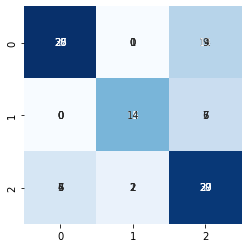

In [34]:
for i in range(0,modelCount):
  print("Evaluating",modelLabels[i],"\n")
  model = models[i]
  _, acc = model.evaluate(X_test,y_test_cat)
  print('Accuracy of train set: %.2f' % (acc*100))
  y_predict = model.predict(X_test)
  y_p=np.argmax(y_predict, axis=1).reshape(96,1)
  print('\n\nTest Predict Report===============\n')
  print(classification_report(y_test,y_p))
  print('\n\nTest Cunfusion Matrix===============\n')
  matrix_confusion=(confusion_matrix(y_test,y_p))
  print(matrix_confusion)
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
  print("\n\n================================================================\n")

# Accuracy Plot



5 Layers, 16 Units, ReLu 



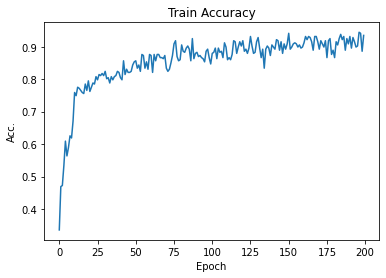



6 Layers, 32 Units, ReLu 



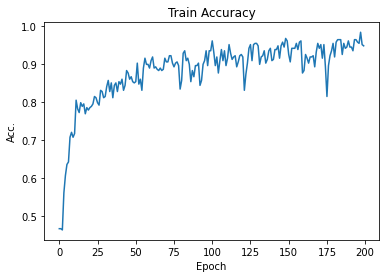



3 Layers, 20 Units, Relu 



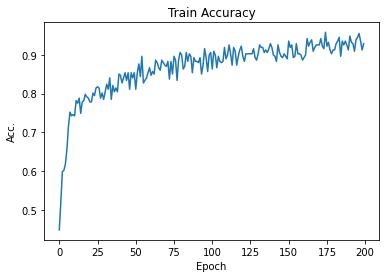



1 TanH Layer, 6 Layers, 32 Units, ReLu 



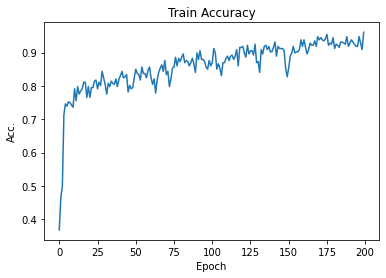



5 Layers, 16 Units, ReLu 



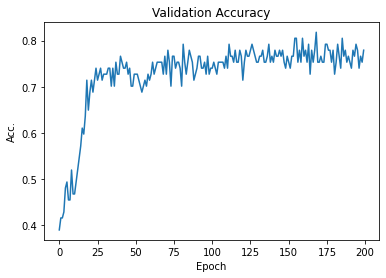



6 Layers, 32 Units, ReLu 



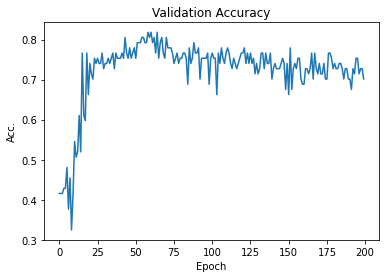



3 Layers, 20 Units, Relu 



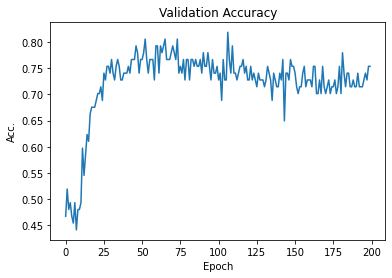



1 TanH Layer, 6 Layers, 32 Units, ReLu 



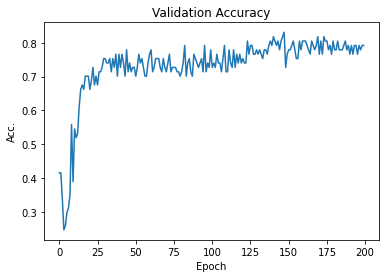

In [35]:
for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['accuracy'])
  plt.title('Train Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Acc.')
  plt.show()
  print("\n===================\n")


for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['val_accuracy'])
  plt.title('Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Acc.')
  plt.show()
  print("\n===================\n")


# Loss Plot

5 Layers, 16 Units, ReLu 



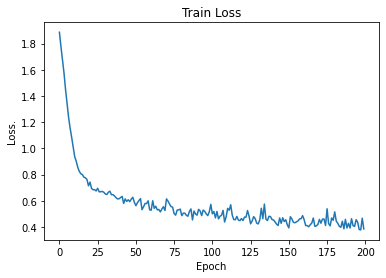



6 Layers, 32 Units, ReLu 



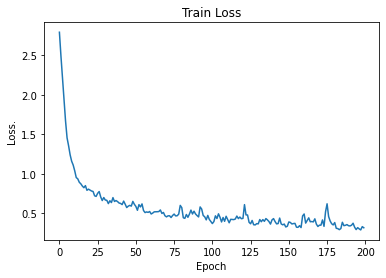



3 Layers, 20 Units, Relu 



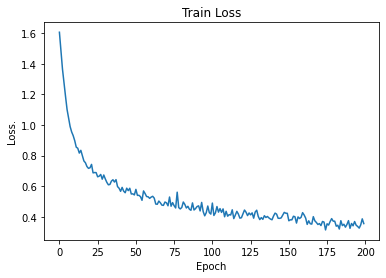



1 TanH Layer, 6 Layers, 32 Units, ReLu 



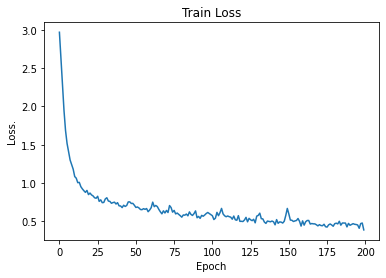



5 Layers, 16 Units, ReLu 



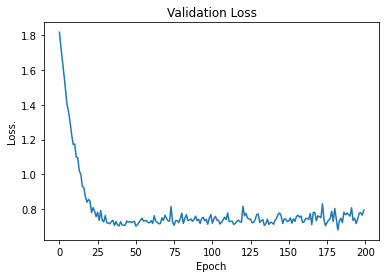



6 Layers, 32 Units, ReLu 



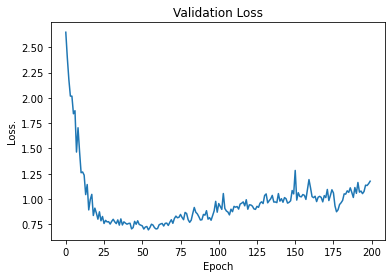



3 Layers, 20 Units, Relu 



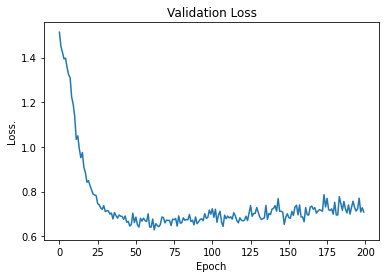



1 TanH Layer, 6 Layers, 32 Units, ReLu 



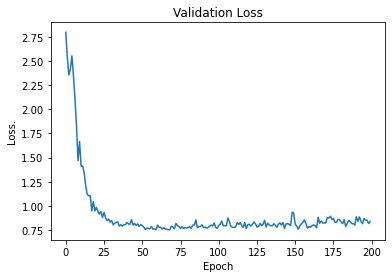

In [36]:
for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['loss'])
  plt.title('Train Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss.')
  plt.show()
  print("\n===================\n")

for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['val_loss'])
  plt.title('Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss.')
  plt.show()
  print("\n===================\n")


# KFold

In [39]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for x in range(0,modelCount):
  i=0
  model=models[x]
  print("\n\n#Model ",x)
  for train, val in kfold.split(X_train, y_train):
    trainX, valX = X_train[train], X_train[val]
    trainY, valY = y_train[train], y_train[val]
    valY_cat=np_utils.to_categorical(valY)
    trainY_cat=np_utils.to_categorical(trainY)
    history=model.fit(trainX, trainY_cat, epochs=200, validation_split=0.2,verbose =0).history
    _, acc = model.evaluate(valX,valY_cat)
    print("\n\n#Fold ",i)
    print('Accuracy : %.2f' % (acc*100))
    y_predict = model.predict(valX)
    y_p=np.argmax(y_predict, axis=1)
    print('\n\nValidate Predict Report ===============\n')
    print(classification_report(valY,y_p))
    print('\n\nvalidate Cunfusion Matrix===============\n')
    matrix_confusion=(confusion_matrix(valY,y_p))
    print(matrix_confusion,"\n")
    print('\n============================\n')
    i+=1
print('\n============================\n')



#Model  0
3/3 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.8442


#Fold  0
Accuracy : 84.42


Validate Predict Report ===============

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.92      1.00      0.96        22
           2       0.85      0.80      0.82        35

    accuracy                           0.84        77
   macro avg       0.84      0.85      0.84        77
weighted avg       0.84      0.84      0.84        77



validate Cunfusion Matrix===============

[[15  0  5]
 [ 0 22  0]
 [ 5  2 28]] 



3/3 [==============================] - 0s 5ms/step - loss: 0.9326 - accuracy: 0.7792


#Fold  1
Accuracy : 77.92


Validate Predict Report ===============

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.85      0.81      0.83        21
           2       0.75      0.77      0.76    